## Sample Hypothesis Test

In [5]:
# Check the dataset directory
%pwd

'C:\\Users\\SK\\Desktop\\Python\\Python\\Python Project\\4. Sample of Hypothesis Test'

In [6]:
# Change the working directory
import os
os.chdir("/Users/SK/Desktop/SK/NUS EBA/Semester 2/Statistical BootCamp/WK3")

In [7]:
# Import the functions
import pandas as pd
import numpy as np
from pandas import DataFrame, read_csv

In [8]:
# Read the csv file
df = pd.read_csv("hypothesis1.csv")

In [9]:
df.head()

,ID,Price
0,1,8.7
1,2,29.2
2,3,30.7
3,4,4.1
4,5,23.1


In [11]:
df.describe

<bound method NDFrame.describe of       ID  Price
0      1    8.7
1      2   29.2
2      3   30.7
3      4    4.1
4      5   23.1
5      6   20.1
6      7   24.2
7      8   10.1
8      9   24.5
9     10   36.3
10    11   18.3
11    12   39.2
12    13    9.3
13    14   23.3
14    15   25.8
15    16   25.8
16    17   23.1
17    18    2.0
18    19    5.8
19    20   21.9
20    21   34.5
21    22    9.6
22    23   14.6
23    24   18.2
24    25   16.7
25    26   23.3
26    27    1.0
27    28   18.2
28    29    2.0
29    30   25.1
..   ...    ...
470  471   20.4
471  472   17.5
472  473   15.5
473  474   26.4
474  475    8.9
475  476    5.0
476  477   18.0
477  478   26.7
478  479   19.7
479  480   17.8
480  481   33.6
481  482   16.7
482  483   28.5
483  484   26.4
484  485   35.6
485  486   19.3
486  487   28.2
487  488   21.7
488  489   21.5
489  490   15.0
490  491   16.1
491  492   21.3
492  493   34.7
493  494   15.6
494  495   16.2
495  496    7.0
496  497   20.7
497  498   19.1
498  4

#### One Sample T-Test the mean = 20
- Null Hypothesis: mean = 20
- Alternate Hypothesis: mean != 20


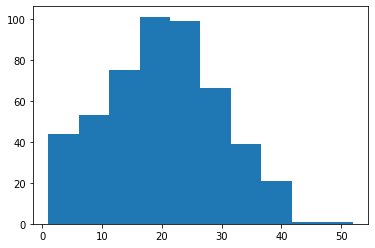

In [15]:
# Plot the histogram
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(x=df['Price'], bins =10)
plt.show()

In [19]:
# Perform one-sample t-test 
from scipy import stats
stats.ttest_1samp(df['Price'], 20, axis =0)

Ttest_1sampResult(statistic=0.5671607199396566, pvalue=0.5708600365433916)

#### Try mean = 15, mean != 15 and mean = 15, mean > 15

In [21]:
# Check the mean of the data
import statistics
statistics.mean(df['Price'])

20.23952

In [22]:
#  mean = 15, mean != 15 
stats.ttest_1samp(df['Price'], 15, axis = 0)

Ttest_1sampResult(statistic=12.406688106789415, pvalue=5.385479108540096e-31)

In [38]:
# one-tailed, mean greater than 15
m = 15
results = stats.ttest_1samp(df['Price'], m)
alpha = 0.05
if (results[0] > 0) & (results[1]/2 < alpha):
    print ("reject null hypothesis, mean is greater than {}".format(m))
else:
    print ("accept null hypothesis")

reject null hypothesis, mean is greater than 15


#### Two samples t-test

In [39]:
df2 = pd.read_csv("hypothesis2.csv")

In [40]:
df2.head()

,ID,Price_sg,Price_us
0,1,8.7,22.427437
1,2,29.2,37.452648
2,3,30.7,41.165205
3,4,4.1,35.244494
4,5,23.1,35.862442


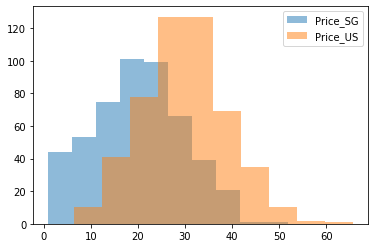

In [41]:
# Plot the histogram
from matplotlib import pyplot
pyplot.hist(df2['Price_sg'], alpha = 0.5, label ='Price_SG')
pyplot.hist(df2['Price_us'], alpha = 0.5, label = 'Price_US')
pyplot.legend(loc='upper right')
pyplot.show()

In [42]:
# Two samples independent t test
# Price SG = Price US ?
# Price_sg is not equal to Price_us since p-value < 0.05
tStat, pValue = stats.ttest_ind(df2['Price_sg'], df2["Price_us"], equal_var = False)
print("P-Value:{0} T-Statistics:{1}".format(pValue, tStat))

P-Value:1.0963111628568788e-54 T-Statistics:-16.57612538332381


In [43]:
# Price SG < Price US
results = stats.ttest_ind(df2['Price_sg'], df2["Price_us"], equal_var=False)
alpha = 0.05
if (results[0] < 0) & (results[1]/2 < alpha):
    print ("reject null hypothesis, mean of {} is less than mean of {}".format('Price_sg','Price_us'))
else:
    print ("accept null hypothesis")

reject null hypothesis, mean of Price_sg is less than mean of Price_us


In [49]:
# Check the Price_sg mean and confirm 
statistics.mean(df2['Price_sg'])

20.23952

In [48]:
# Check the Price_us mean and confirm 
statistics.mean(df2['Price_us'])

29.942225269026

#### 2 samples t-test with different years

In [50]:
df3 = pd.read_csv('hypothesis3.csv')

In [51]:
df3.head()

,ID,Price_sg_2018,Price_sg_2019
0,1,8.695019,19.198756
1,2,29.157653,14.237896
2,3,30.748636,21.781418
3,4,4.072906,24.251063
4,5,23.134995,19.423781


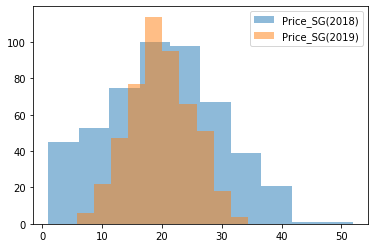

In [53]:
# Plot the histogram
from matplotlib import pyplot
pyplot.hist(df3['Price_sg_2018'], alpha = 0.5, label ='Price_SG(2018)')
pyplot.hist(df3['Price_sg_2019'], alpha = 0.5, label = 'Price_SG(2019)')
pyplot.legend(loc='upper right')
pyplot.show()

In [55]:
# Perform T-test on Price_sg_2018 and Price_sg_2019
# Price_sg_2018  = Price_sg_2019
tStat, pValue = stats.ttest_ind(df3['Price_sg_2018'], df3["Price_sg_2019"], equal_var = False)
print("P-Value:{0} T-Statistics:{1}".format(pValue, tStat))

P-Value:0.42596310119882297 T-Statistics:0.7965387808342332


In [56]:
# Check the Price_sg_2018 mean and confirm 
statistics.mean(df3['Price_sg_2018'])

20.238379274762

In [57]:
# Check the Price_sg_2019 mean and confirm 
statistics.mean(df3['Price_sg_2019'])

19.854693132576